In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner

# Part 1

In [2]:
# POINT TO TARGET SITE 

url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
url

'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

In [3]:
# PULL DATA FROM SITE

html_doc = requests.get(url).text
#html_doc

In [4]:
# CREATE BEAUTIFUL SOUP OBJECT 

from bs4 import BeautifulSoup
soup = BeautifulSoup(html_doc, 'html.parser')

#print(soup.prettify())

In [5]:
# INITIALIZE 4 LISTS TO COLLECT DATA

a0 = []
a1 = []
a2 = []
a3 = []

In [6]:
# PARSE DATA AND STORE IN LISTS 

n = 0
for string in soup.table.stripped_strings:

    if(n==3):
        #print("n=3")
        entry = repr(string)
        entry.strip()
        #print(entry)
        a3.append(entry)
        n=0
    
    if(n==2):
        #print("n=2")
        entry = repr(string)
        entry.strip()
        #print(entry)
        a2.append(entry)
        n=3

    if(n==1):
        #print("n=1")
        entry = repr(string)
        entry.strip()
        #print(entry)
        a1.append(entry)
        n=2  

    if(n==0):
        #print("n=0")
        entry = repr(string)
        entry.strip()
        #print(entry)
        a0.append(entry)
        n=1

In [7]:
# EXTRACT RELEVANT LISTS AND PUT INTO DF
df0 = pd.DataFrame(a0)
df1 = pd.DataFrame(a1)
df2 = pd.DataFrame(a2)

In [8]:
df_final = pd.concat([df0, df1, df2], axis=1)

In [9]:
df_final.head()

,0,0,0
0,'Postcode','Borough','Neighbourhood'
1,'M1A','Not assigned','Not assigned'
2,'M2A','Not assigned','Not assigned'
3,'M3A','North York','Parkwoods'
4,'M4A','North York','Victoria Village'


In [10]:
# MAKE 1ST ROW THE HEADER 

df_final.columns = ['Postcode', 'Borough', 'Neighbourhood']
df_final = df_final[1:]

In [79]:
# REMOVE SPECIAL CHARACTERS 

df_final["Borough"] = df_final["Borough"].str.replace("\'", '')
df_final["Borough"] = df_final["Borough"].str.replace("\"", '')
df_final["Postcode"] = df_final["Postcode"].str.replace("\'", '')
df_final["Neighbourhood"] = df_final["Neighbourhood"].str.replace("\'", '')

In [81]:
df_final.head()

,Postcode,Borough,Neighbourhood
1,M1A,Not assigned,Not assigned
2,M2A,Not assigned,Not assigned
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,Harbourfront


In [82]:
# REMOVE ALL BOROUGHS WHICH HAVE "NOT ASSIGNED"
df_final2 = df_final.query('Borough != "Not assigned"').copy()
df_final2.head()

,Postcode,Borough,Neighbourhood
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,Harbourfront
6,M5A,Downtown Toronto,Regent Park
7,M6A,North York,Lawrence Heights


In [83]:
# REPLACE ANY NOT ASSIGNED OCCURENCES IN NEIGHBOURHOOD WITH BOROUGH NAME
for index, row in df_final2.iterrows():
    if row['Neighbourhood'] == "Not assigned":
        row['Neighbourhood'] = row['Borough']

In [84]:
# CHECK
df_final2.query('Borough == "Not assigned"')

,Postcode,Borough,Neighbourhood


In [85]:
# COMBINE NEIGHBOURHOOD IF POSTCODE SAME
df_final3 = df_final2.groupby(['Postcode','Borough'],as_index=False).agg(lambda x : x.sum() if x.dtype=='float64' else ', '.join(x))

In [86]:
df_final3.head()

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [87]:
df_final3.shape

(103, 3)

# Part 2

In [19]:
# DOWNLOAD GEO LOCATION DATA
!wget -O geo.csv https://cocl.us/Geospatial_data

--2018-12-25 11:56:19--  https://cocl.us/Geospatial_data
Resolving cocl.us (cocl.us)... 169.48.113.201
Connecting to cocl.us (cocl.us)|169.48.113.201|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]
--2018-12-25 11:56:19--  https://ibm.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv
Resolving ibm.box.com (ibm.box.com)... 107.152.27.197
Connecting to ibm.box.com (ibm.box.com)|107.152.27.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.ent.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]
--2018-12-25 11:56:19--  https://ibm.ent.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv
Resolving ibm.ent.box.com (ibm.ent.box.com)... 107.152.27.211
Connecting to ibm.ent.box.com (ibm.ent.box.com)|107.152.27.211|:443... connected.
HTTP request sent, awaiting response... 302 Found

In [20]:
#IMPORT GEOLOCATION DATA
df_geo = pd.read_csv("geo.csv")
df_geo.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [21]:
# RENAME HEADER 
df_geo.rename(columns = {"Postal Code":"Postcode"}, inplace = True)
df_geo.head()

,Postcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [73]:
df_final3.shape

(103, 3)

In [22]:
df_withGeo = pd.merge(df_final3, df_geo, how='left', on=['Postcode'])
df_withGeo.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [68]:
df_withGeo.shape

(103, 5)

# PART 3

In [23]:
# FOURSQUARE ID

CLIENT_ID = 'DBNBYB4BGFBZXNLWMBQHNYCWPSAYEEUCK0X4SDHZW5IBULAE' # your Foursquare ID
CLIENT_SECRET = 'G3KOPOG0EDKGLF03TY1PGOUMUYE3LV5Q0KCFJ2JQOZPNFPFS' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DBNBYB4BGFBZXNLWMBQHNYCWPSAYEEUCK0X4SDHZW5IBULAE
CLIENT_SECRET:G3KOPOG0EDKGLF03TY1PGOUMUYE3LV5Q0KCFJ2JQOZPNFPFS


## Using a radius of 5km to identify for nearby venues

In [154]:
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Postcode', 
                  'Postcode Latitude', 
                  'Postcode Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [155]:
#radius = 5000
LIMIT = 100
# type your answer here
canada_venues = getNearbyVenues(names=df_withGeo['Postcode'],
                                   latitudes=df_withGeo['Latitude'],
                                   longitudes=df_withGeo['Longitude']
                                  )

M1B
M1C
M1E
M1G
M1H
M1J
M1K
M1L
M1M
M1N
M1P
M1R
M1S
M1T
M1V
M1W
M1X
M2H
M2J
M2K
M2L
M2M
M2N
M2P
M2R
M3A
M3B
M3C
M3H
M3J
M3K
M3L
M3M
M3N
M4A
M4B
M4C
M4E
M4G
M4H
M4J
M4K
M4L
M4M
M4N
M4P
M4R
M4S
M4T
M4V
M4W
M4X
M4Y
M5A
M5B
M5C
M5E
M5G
M5H
M5J
M5K
M5L
M5M
M5N
M5P
M5R
M5S
M5T
M5V
M5W
M5X
M6A
M6B
M6C
M6E
M6G
M6H
M6J
M6K
M6L
M6M
M6N
M6P
M6R
M6S
M7A
M7R
M7Y
M8V
M8W
M8X
M8Y
M8Z
M9A
M9B
M9C
M9L
M9M
M9N
M9P
M9R
M9V
M9W


In [156]:
canada_venues.groupby('Postcode').count()

,Postcode Latitude,Postcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Postcode,,,,,,
M1B,100,100,100,100,100,100
M1C,81,81,81,81,81,81
M1E,100,100,100,100,100,100
M1G,98,98,98,98,98,98
M1H,100,100,100,100,100,100
M1J,100,100,100,100,100,100
M1K,100,100,100,100,100,100
M1L,100,100,100,100,100,100
M1M,100,100,100,100,100,100


In [157]:
canada_venues.groupby('Postcode').head()

,Postcode,Postcode Latitude,Postcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M1B,43.806686,-79.194353,Toronto Pan Am Sports Centre,43.790623,-79.193869,Athletics & Sports
1,M1B,43.806686,-79.194353,African Rainforest Pavilion,43.817725,-79.183433,Zoo Exhibit
2,M1B,43.806686,-79.194353,Toronto Zoo,43.820582,-79.181551,Zoo
3,M1B,43.806686,-79.194353,Polar Bear Exhibit,43.823372,-79.185145,Zoo
4,M1B,43.806686,-79.194353,Australasia Pavillion,43.822563,-79.183286,Zoo Exhibit
100,M1C,43.784535,-79.160497,"Lamanna's Bakery, Cafe & Fine Foods",43.797971,-79.148432,Bakery
101,M1C,43.784535,-79.160497,Port Union Waterfront Park,43.774967,-79.134393,Park
102,M1C,43.784535,-79.160497,Fratelli Village Pizzeria,43.784008,-79.169787,Italian Restaurant
103,M1C,43.784535,-79.160497,Toronto Pan Am Sports Centre,43.790623,-79.193869,Athletics & Sports
104,M1C,43.784535,-79.160497,Shamrock Burgers,43.783823,-79.168406,Burger Joint


In [158]:
len(canada_venues['Postcode'].unique())

103

In [159]:
print('There are {} uniques categories.'.format(len(canada_venues['Venue Category'].unique())))

There are 255 uniques categories.


## Analysis

#### Using one-hot encoding to encode the 255 unique venue categories before fitting to Kmeans model

In [160]:
# ANALYSIS

# one hot encoding
toronto_onehot = pd.get_dummies(canada_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Postcode'] = canada_venues['Postcode'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Postcode,ATM,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,American Restaurant,Antique Shop,Aquarium,...,Vietnamese Restaurant,Warehouse Store,Water Park,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,M1B,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M1B,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,M1B,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,M1B,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,M1B,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [161]:
toronto_onehot.shape

(10251, 256)

In [162]:
toronto_grouped = toronto_onehot.groupby('Postcode').mean().reset_index()
toronto_grouped.head()

,Postcode,ATM,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,American Restaurant,Antique Shop,Aquarium,...,Vietnamese Restaurant,Warehouse Store,Water Park,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,M1B,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.020000,0.100000
1,M1C,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.012346,0.0,0.00,0.024691,0.185185
2,M1E,0.0,0.0,0.00,0.0,0.0,0.0,0.01,0.0,0.0,...,0.01,0.0,0.0,0.0,0.0,0.000000,0.0,0.01,0.000000,0.000000
3,M1G,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.010204,0.0,0.00,0.000000,0.000000
4,M1H,0.0,0.0,0.00,0.0,0.0,0.0,0.01,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.000000,0.000000


In [163]:
toronto_grouped.shape

(103, 256)

#### Identifying the top 10 venue by Borough (i.e. Postcode) - To limit the Kmeans input data parameters 

In [164]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [165]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Postcode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Postcode'] = toronto_grouped['Postcode']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Postcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Coffee Shop,Zoo Exhibit,Sandwich Place,Pharmacy,Fast Food Restaurant,Pizza Place,Burger Joint,Park,Breakfast Spot,Chinese Restaurant
1,M1C,Zoo Exhibit,Coffee Shop,Park,Fast Food Restaurant,Sandwich Place,Breakfast Spot,Zoo,Liquor Store,Smoothie Shop,Beer Store
2,M1E,Coffee Shop,Sandwich Place,Fast Food Restaurant,Pharmacy,Bank,Park,Pizza Place,Indian Restaurant,Gym,Beer Store
3,M1G,Coffee Shop,Fast Food Restaurant,Sandwich Place,Pizza Place,Burger Joint,Gym,Pharmacy,Park,Grocery Store,Breakfast Spot
4,M1H,Coffee Shop,Fast Food Restaurant,Chinese Restaurant,Indian Restaurant,Sandwich Place,Pizza Place,Burger Joint,Park,Caribbean Restaurant,Gym


In [166]:
neighborhoods_venues_sorted.shape

(103, 11)

## Build Clusters

In [56]:
from sklearn.cluster import KMeans

#### Setting k=5 

In [167]:
# KMEANS

# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Postcode', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

In [168]:
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:30] 

array([4, 4, 4, 4, 4, 4, 1, 1, 4, 0, 1, 1, 3, 3, 3, 3, 4, 3, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

#### Recombine dataframe to aid analysis

In [169]:
# COMBINE DATAFRAMES TO GET ALL INFO

# add clustering labels
toronto_grouped['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_grouped = toronto_grouped.join(neighborhoods_venues_sorted.set_index('Postcode'), on='Postcode')

In [170]:
# COMBINE DATAFRAMES TO GET ALL INFO

results = pd.DataFrame()
results[['Postcode','Cluster Labels']] = toronto_grouped[['Postcode','Cluster Labels']]

results = results.join(df_withGeo.set_index('Postcode'), on='Postcode')

results = results.join(neighborhoods_venues_sorted.set_index('Postcode'), on='Postcode')
results.head()

,Postcode,Cluster Labels,Borough,Neighbourhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,4,Scarborough,"Rouge, Malvern",43.806686,-79.194353,Coffee Shop,Zoo Exhibit,Sandwich Place,Pharmacy,Fast Food Restaurant,Pizza Place,Burger Joint,Park,Breakfast Spot,Chinese Restaurant
1,M1C,4,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Zoo Exhibit,Coffee Shop,Park,Fast Food Restaurant,Sandwich Place,Breakfast Spot,Zoo,Liquor Store,Smoothie Shop,Beer Store
2,M1E,4,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Coffee Shop,Sandwich Place,Fast Food Restaurant,Pharmacy,Bank,Park,Pizza Place,Indian Restaurant,Gym,Beer Store
3,M1G,4,Scarborough,Woburn,43.770992,-79.216917,Coffee Shop,Fast Food Restaurant,Sandwich Place,Pizza Place,Burger Joint,Gym,Pharmacy,Park,Grocery Store,Breakfast Spot
4,M1H,4,Scarborough,Cedarbrae,43.773136,-79.239476,Coffee Shop,Fast Food Restaurant,Chinese Restaurant,Indian Restaurant,Sandwich Place,Pizza Place,Burger Joint,Park,Caribbean Restaurant,Gym


In [115]:
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

Solving environment: done

# All requested packages already installed.



In [116]:
# FINDING LAT LONG FOR TORONTO

address = 'Toronto'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  after removing the cwd from sys.path.


The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [117]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done

# All requested packages already installed.



In [126]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [171]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(results['Latitude'], results['Longitude'], results['Borough'], results['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Appears that top most common venue tend to be clustered based off proximity to airport/citycenter
#### could potentially be indication off consumption power (i.e. income) of population-flow/residents in that area  
#### adding additional data such as census data would provide more insights

# !!!! <b> This is a back-up snapshot of Folium, as there might be issues displaying it on github !!!! </b>

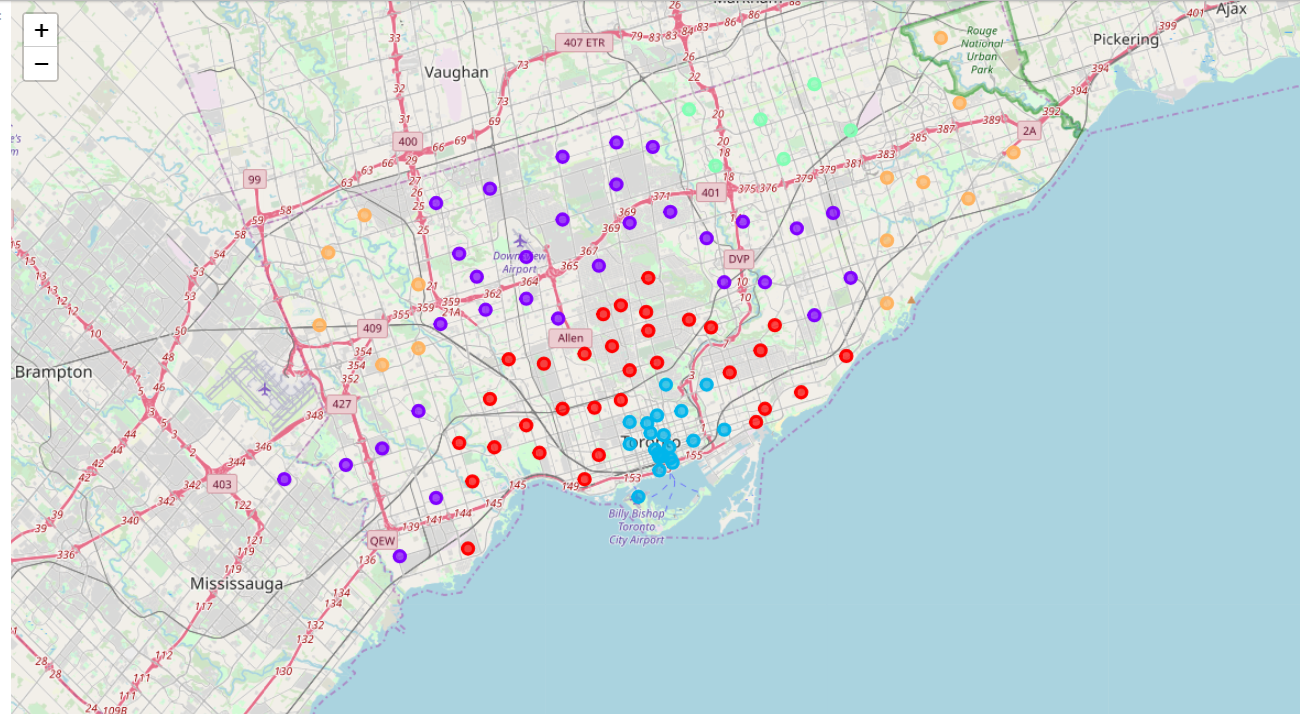

In [179]:
from IPython.display import display, Image
display(Image(filename='Capture.PNG'))

## ANALYSE CLUSTERS

### CLUSTER 1

In [172]:
results.loc[results['Cluster Labels'] == 0, results.columns[[1] + list(range(5, results.shape[1]))]]

,Cluster Labels,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,0,-79.264848,Beach,Coffee Shop,Park,Breakfast Spot,Bakery,Café,Liquor Store,Fish & Chips Shop,Pub,Gastropub
35,0,-79.309937,Park,Gastropub,Middle Eastern Restaurant,Café,Bakery,Indian Restaurant,Coffee Shop,Brewery,Gym / Fitness Center,Beach
36,0,-79.318389,Café,Park,Gastropub,Greek Restaurant,Bakery,Coffee Shop,Brewery,Pizza Place,Indian Restaurant,BBQ Joint
37,0,-79.293031,Park,Coffee Shop,Beach,Café,Bakery,Breakfast Spot,Pub,Ice Cream Shop,Gastropub,Pizza Place
38,0,-79.363452,Park,Café,Italian Restaurant,Coffee Shop,Greek Restaurant,Bakery,Spa,Sandwich Place,Grocery Store,BBQ Joint
39,0,-79.349372,Park,Café,Coffee Shop,Greek Restaurant,Gastropub,Bakery,Dessert Shop,Italian Restaurant,BBQ Joint,Brewery
40,0,-79.338106,Park,Coffee Shop,Café,Italian Restaurant,Greek Restaurant,Pizza Place,Breakfast Spot,Brewery,Vietnamese Restaurant,Bakery
42,0,-79.315572,Café,Coffee Shop,Park,Beach,Brewery,Pizza Place,Gastropub,Ice Cream Shop,Bakery,Bar
44,0,-79.388790,Café,Coffee Shop,Bakery,Italian Restaurant,Park,Japanese Restaurant,Burger Joint,Grocery Store,Sandwich Place,Sushi Restaurant
45,0,-79.390197,Park,Coffee Shop,Café,Bakery,Italian Restaurant,Burger Joint,Trail,Bagel Shop,Sandwich Place,BBQ Joint


### CLUSTER 2

In [173]:
results.loc[results['Cluster Labels'] == 1, results.columns[[1] + list(range(5, results.shape[1]))]]

,Cluster Labels,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,1,-79.262029,Coffee Shop,Middle Eastern Restaurant,Park,Chinese Restaurant,Indian Restaurant,Burger Joint,Grocery Store,Gym,Liquor Store,Beach
7,1,-79.284577,Middle Eastern Restaurant,Breakfast Spot,Park,Coffee Shop,Gastropub,Beach,Bakery,Café,Thai Restaurant,Gym / Fitness Center
10,1,-79.273304,Coffee Shop,Middle Eastern Restaurant,Indian Restaurant,Chinese Restaurant,Caribbean Restaurant,Burger Joint,Sushi Restaurant,Gym,Grocery Store,Supermarket
11,1,-79.295849,Middle Eastern Restaurant,Burger Joint,Indian Restaurant,Chinese Restaurant,Coffee Shop,Supermarket,Caribbean Restaurant,Sushi Restaurant,Dessert Shop,Pet Store
19,1,-79.385975,Korean Restaurant,Middle Eastern Restaurant,Supermarket,Bakery,Japanese Restaurant,Sushi Restaurant,Coffee Shop,Bagel Shop,Chinese Restaurant,Café
20,1,-79.374714,Burger Joint,Park,Bakery,Middle Eastern Restaurant,Japanese Restaurant,Café,Coffee Shop,Steakhouse,Supermarket,Sushi Restaurant
21,1,-79.408493,Korean Restaurant,Coffee Shop,Middle Eastern Restaurant,Sushi Restaurant,Café,Bagel Shop,Supermarket,Chinese Restaurant,Furniture / Home Store,Grocery Store
22,1,-79.408493,Korean Restaurant,Middle Eastern Restaurant,Café,Burger Joint,Coffee Shop,Bakery,Sushi Restaurant,Furniture / Home Store,Japanese Restaurant,Ramen Restaurant
23,1,-79.400049,Coffee Shop,Park,Bakery,Café,Sushi Restaurant,Italian Restaurant,Burger Joint,Supermarket,Bagel Shop,Ice Cream Shop
24,1,-79.442259,Coffee Shop,Korean Restaurant,Middle Eastern Restaurant,Sushi Restaurant,Grocery Store,Japanese Restaurant,Supermarket,Bagel Shop,Café,Burger Joint


### CLUSTER 3

In [174]:
results.loc[results['Cluster Labels'] == 2, results.columns[[1] + list(range(5, results.shape[1]))]]

,Cluster Labels,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
41,2,-79.352188,Coffee Shop,Park,Café,Pizza Place,Italian Restaurant,Japanese Restaurant,Bakery,Hotel,Diner,Middle Eastern Restaurant
43,2,-79.340923,Coffee Shop,Café,Japanese Restaurant,Farmers Market,Park,Pizza Place,Bakery,Diner,Italian Restaurant,Beach
50,2,-79.377529,Coffee Shop,Café,Park,Japanese Restaurant,Restaurant,Italian Restaurant,Breakfast Spot,Gastropub,Farmers Market,Hotel
51,2,-79.367675,Coffee Shop,Park,Café,Japanese Restaurant,Hotel,Italian Restaurant,Farmers Market,Restaurant,Gastropub,Concert Hall
52,2,-79.383160,Coffee Shop,Café,Japanese Restaurant,Restaurant,Italian Restaurant,Hotel,Concert Hall,Farmers Market,Theater,Vegetarian / Vegan Restaurant
53,2,-79.360636,Coffee Shop,Café,Hotel,Japanese Restaurant,Park,Theater,Neighborhood,Restaurant,Breakfast Spot,Farmers Market
54,2,-79.378937,Coffee Shop,Japanese Restaurant,Hotel,Café,Farmers Market,Italian Restaurant,Diner,Theater,Restaurant,Gastropub
55,2,-79.375418,Coffee Shop,Japanese Restaurant,Hotel,Café,Park,Gastropub,Restaurant,Farmers Market,Theater,Sporting Goods Shop
56,2,-79.373306,Coffee Shop,Hotel,Park,Café,Theater,Restaurant,Farmers Market,Sandwich Place,Japanese Restaurant,Baseball Stadium
57,2,-79.387383,Coffee Shop,Café,Hotel,Japanese Restaurant,Concert Hall,Restaurant,Theater,Vegetarian / Vegan Restaurant,Sandwich Place,Museum


### CLUSTER 4

In [175]:
results.loc[results['Cluster Labels'] == 3, results.columns[[1] + list(range(5, results.shape[1]))]]

,Cluster Labels,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,3,-79.262029,Chinese Restaurant,Indian Restaurant,Coffee Shop,Caribbean Restaurant,Sushi Restaurant,Park,Hakka Restaurant,Noodle House,Pizza Place,Burger Joint
13,3,-79.304302,Chinese Restaurant,Middle Eastern Restaurant,Coffee Shop,Caribbean Restaurant,Sushi Restaurant,Noodle House,Supermarket,Breakfast Spot,Bakery,Indian Restaurant
14,3,-79.284577,Chinese Restaurant,Caribbean Restaurant,Bubble Tea Shop,Bakery,Indian Restaurant,Noodle House,Vietnamese Restaurant,Breakfast Spot,Japanese Restaurant,Asian Restaurant
15,3,-79.318389,Chinese Restaurant,Caribbean Restaurant,Bakery,Bubble Tea Shop,Japanese Restaurant,Sushi Restaurant,Grocery Store,American Restaurant,Coffee Shop,Korean Restaurant
17,3,-79.363452,Chinese Restaurant,Bakery,Japanese Restaurant,Caribbean Restaurant,Coffee Shop,Supermarket,Furniture / Home Store,Burger Joint,Middle Eastern Restaurant,Sushi Restaurant
18,3,-79.346556,Chinese Restaurant,Caribbean Restaurant,Japanese Restaurant,Bakery,Middle Eastern Restaurant,Coffee Shop,Shopping Mall,Supermarket,Furniture / Home Store,Cantonese Restaurant


### CLUSTER 5

In [176]:
results.loc[results['Cluster Labels'] == 4, results.columns[[1] + list(range(5, results.shape[1]))]]

,Cluster Labels,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,4,-79.194353,Coffee Shop,Zoo Exhibit,Sandwich Place,Pharmacy,Fast Food Restaurant,Pizza Place,Burger Joint,Park,Breakfast Spot,Chinese Restaurant
1,4,-79.160497,Zoo Exhibit,Coffee Shop,Park,Fast Food Restaurant,Sandwich Place,Breakfast Spot,Zoo,Liquor Store,Smoothie Shop,Beer Store
2,4,-79.188711,Coffee Shop,Sandwich Place,Fast Food Restaurant,Pharmacy,Bank,Park,Pizza Place,Indian Restaurant,Gym,Beer Store
3,4,-79.216917,Coffee Shop,Fast Food Restaurant,Sandwich Place,Pizza Place,Burger Joint,Gym,Pharmacy,Park,Grocery Store,Breakfast Spot
4,4,-79.239476,Coffee Shop,Fast Food Restaurant,Chinese Restaurant,Indian Restaurant,Sandwich Place,Pizza Place,Burger Joint,Park,Caribbean Restaurant,Gym
5,4,-79.239476,Coffee Shop,Burger Joint,Park,Chinese Restaurant,Indian Restaurant,Pharmacy,Steakhouse,Sushi Restaurant,Bookstore,Pet Store
8,4,-79.239476,Coffee Shop,Sandwich Place,Park,Beer Store,Pharmacy,Grocery Store,Burger Joint,Gym,Pizza Place,Bank
16,4,-79.205636,Zoo Exhibit,Fast Food Restaurant,Sandwich Place,Coffee Shop,Pharmacy,Pizza Place,Grocery Store,Restaurant,Hakka Restaurant,Burger Joint
96,4,-79.565963,Coffee Shop,Hotel,Sandwich Place,Burger Joint,Grocery Store,Italian Restaurant,Steakhouse,Fast Food Restaurant,Bank,Indian Restaurant
97,4,-79.532242,Coffee Shop,Pizza Place,Fast Food Restaurant,Sandwich Place,Vietnamese Restaurant,Hardware Store,Pharmacy,Indian Restaurant,Grocery Store,Bank
